## Programming Questions

In [1]:
# reading the data into pandas dataframe
import pandas as pd
part_dataframe = pd.read_csv('Programming_Part1_TTI_Challenge.csv' , sep ='\\t', engine ='python' )
part_dataframe.head()

,Class,PartNo,X,Y
0,AAA,X135,0.21,1.124
1,AAA,X126,0.21,1.179
2,EBHA,X195,0.32,1.191
3,EBHA,X194,0.82,1.249
4,AAA,X139,0.81,1.255


In [9]:
# geting the data types
print (part_dataframe.dtypes)

Class      object
PartNo     object
X         float64
Y         float64
dtype: object


## Descriptive statistics

In [10]:
# geting the descriptive statistics
print (part_dataframe.describe())

                X           Y
count  100.000000  100.000000
mean     5.499100    3.525130
std      2.672921    1.734591
min      0.210000    1.124000
25%      3.515000    2.086250
50%      5.310000    2.974000
75%      7.810000    4.919500
max     10.020000    7.498000


In [28]:
# calculating the geometric mean
import numpy as np
def geometric_mean(list):
    a=np.array(list)
    return a.prod()**(1.0/len(a))
geometric_mean_x = geometric_mean(part_dataframe['X'])
print "the geometric mean of x is: " + str(geometric_mean_x)
geometric_mean_y = geometric_mean(part_dataframe['Y'])
print "the geometric mean of y is: " + str(geometric_mean_y)


the geometric mean of x is: 4.4953243612
the geometric mean of y is: 3.10830980506


## Writing out the dataframe in a SQL table
In this part, I wrote out the dataframe in SQL table in SQLite which is a relational database management system contained in a C programming library. The SQLite database can be imported to MS SQL, MySQL and ... 

In [5]:
# write out the dataframe in a sql table in SQLite
import sqlite3 as sq
import pandas as pd
import pandas.io.sql as pd_sql
# Connect to the database (create if necessary)                  
conn = sq.connect('mydatabase')

# Create the table 'mytable' if necessary
if not pd_sql.table_exists('mytable', conn, 'sqlite'):
    pd.DataFrame.to_sql(part_dataframe, 'mytable', conn)
 
# execute the query to prove that the sql table is created
cur = pd_sql.execute("SELECT X FROM mytable", conn)
print "Here's the data to prove the table exists:"
print cur.fetchall()    

Here's the data to prove the table exists:
[(0.21,), (0.21,), (0.32,), (0.82,), (0.81,), (1.21,), (1.01,), (1.12,), (1.8,), (1.81,), (1.51,), (2.41,), (2.12,), (2.12,), (2.31,), (2.51,), (2.61,), (2.51,), (2.61,), (2.51,), (2.91,), (2.91,), (3.11,), (3.21,), (3.5,), (3.61,), (3.52,), (3.8,), (3.81,), (4.21,), (4.21,), (4.41,), (4.31,), (4.3,), (4.4,), (4.61,), (4.51,), (4.61,), (4.61,), (4.91,), (4.81,), (5.04,), (5.01,), (5.03,), (5.11,), (5.31,), (5.11,), (5.22,), (5.11,), (5.11,), (5.31,), (5.41,), (5.51,), (5.51,), (5.71,), (5.92,), (5.91,), (5.91,), (5.91,), (6.31,), (6.21,), (6.51,), (6.61,), (6.82,), (7.11,), (7.42,), (7.51,), (7.51,), (7.51,), (7.5,), (7.62,), (7.61,), (7.71,), (7.81,), (7.8,), (7.81,), (8.02,), (8.01,), (8.11,), (8.11,), (8.21,), (8.22,), (8.3,), (8.41,), (8.51,), (8.71,), (8.8,), (8.81,), (8.82,), (8.81,), (9.0,), (9.01,), (9.02,), (9.2,), (9.41,), (9.51,), (9.81,), (9.82,), (9.91,), (10.02,)]


## Generate the predictive modeling
Before buiding a predictive or actually regression model for our problem, first we check for the outliers in X and Y, by creating boxplots( points which fall outside the whiskers would be considered as the outliers).Then we would get the correlation table for X and Y and also the scatter plot of these variables to understand their relationship. 

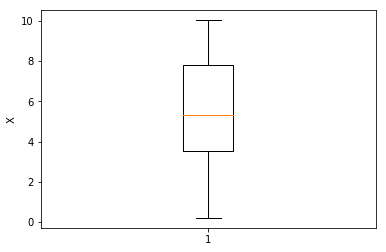

In [32]:
# check for the outliers in X by plotting the box plot of X
import matplotlib.pyplot as plt
plt.boxplot(part_dataframe['X'])
plt.ylabel("X")
plt.show()

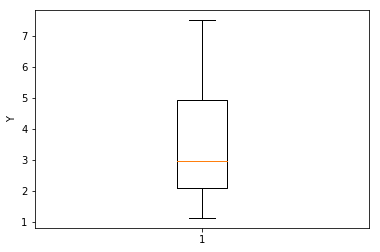

In [31]:
# check for the outliers in y by plotting the box plot of y
import matplotlib.pyplot as plt
plt.boxplot(part_dataframe['Y'])
plt.ylabel("Y")
plt.show()

In [27]:
# geting the correlation table of x and y
part_dataframe.corr()

,X,Y
X,1.000000,0.968403
Y,0.968403,1.000000


This correlation table shows a strong correlation between X and Y

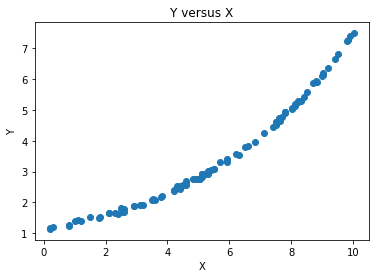

In [28]:
# scatter plot of X versus Y
import matplotlib.pyplot as plt
plt.scatter(part_dataframe['X'],part_dataframe['Y'] )
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Y versus X")
plt.show()

This scatter plot agrees with the correlation table. It shows a strong relationship between X and Y. Because of this relationship, first we would try the linear regression algorithm and then we can try the polynomial regression, because it sounds that a quadratic function can better relate Y to X.

# Implementing linear regression model
For evaluating the accuracy of regression models, we used two metrics: MSE and R-squared. MSE is actually the mean of the squares of the errors, which can assess the quality of the estimator. The smaller value for MSE shows a stronger predictor. R-squared shows the percentage of the variance in the dependent variable that the independent variables explain collectively. It changes between 0 and 1. The stronger predictors have greater R-squareds. 
Also for better validating the model, we splitted the data into train and test sets and built the model on the train set, then evaluate it on the test set. This procedure was repeated 3 times, using shuffleSplit which is a random permutation cross validator, that assigns the indices to split the data into the training and test sets. Then we took the average of the MSE and R-squared and reported them as the accuracy score. 

In [25]:
# linear regression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
x=[]
y=[]
for i in part_dataframe['X']:
    x.append(np.array(i))
for j in part_dataframe['Y']:
    y.append(j)

X_matrix= np.matrix(np.array(x))
X= X_matrix.transpose()
X= np.array(X)
Y = np.array(y)

# Create linear regression object
regr = linear_model.LinearRegression()

sum_r2_score = 0 
sum_mean_squared_error = 0

#getting the indeces for splitting the data into train and test sets 
ss = ShuffleSplit(n_splits=3, test_size=0.25,random_state=0)
for train_index, test_index in ss.split(X,Y):
    
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    regr.fit(X_train, Y_train)
    # Make predictions using the testing set
    Y_pred = regr.predict(X_test)

    sum_r2_score = sum_r2_score + r2_score(Y_test, Y_pred)
    sum_mean_squared_error = sum_mean_squared_error + mean_squared_error(Y_test, Y_pred)

average_r2_score = sum_r2_score/3
average_mean_squared_error = sum_mean_squared_error/3

print ('Coefficients: '+ str(regr.coef_))
print ("Intercept: " + str(regr.intercept_))
# The mean squared error
print ("Mean squared error: " +  str(average_mean_squared_error))
# the R squared
print ("R squared : " + str(average_r2_score))

Coefficients: [ 0.64205137]
Intercept: 0.0142996356021
Mean squared error: 0.180264108221
R squared : 0.930351547261


# Implementing polynomial regression

In [30]:
# polynomial regression ( with degree = 2)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error, r2_score
x=[]
y=[]
for i in part_dataframe['X']:
    x.append(np.array(i))
for j in part_dataframe['Y']:
    y.append(j)

X_matrix= np.matrix(np.array(x))
X= X_matrix.transpose()
X= np.array(X)
Y = np.array(y)

sum_r2_score = 0 
sum_mean_squared_error = 0

#getting the indeces for splitting the data into train and test sets 
ss = ShuffleSplit(n_splits=3, test_size=0.25,random_state=0)
for train_index, test_index in ss.split(X,Y):
    
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    lin_regressor = LinearRegression()

    # pass the order of your polynomial here  
    poly = PolynomialFeatures(2)

    # convert to be used further to linear regression
    X_transform = poly.fit_transform(X_train)
    X_pred = poly.fit_transform(X_test)
    
    # fit this to Linear Regressor
    lin_regressor.fit(X_transform,Y_train) 

    # get the predictions
    Y_pred = lin_regressor.predict(X_pred)
    
    sum_r2_score = sum_r2_score + r2_score(Y_test, Y_pred)
    sum_mean_squared_error = sum_mean_squared_error + mean_squared_error(Y_test, Y_pred)

# getting the average of three times running the algorithm and getting the R-squared and MSE     
average_r2_score = sum_r2_score/3
average_mean_squared_error = sum_mean_squared_error/3

#the coefficients of the regression model
print ('Coefficients: '+ str(lin_regressor.coef_))
# The mean squared error
print ("Mean squared error: " +  str(average_mean_squared_error))
# the R squared
print ("R squared : " + str(average_r2_score))

Coefficients: [ 0.          0.00130171  0.05967363]
Mean squared error: 0.0057179517663
R squared : 0.997715355268


According to the reported MSE and R-squared for linear regression and the polynomial regression, we conclude that the best prediction model would be polynomial regression model with (degrees=2) (Y = 0.00130171X + 0.05967363X^2 )